<a href="https://colab.research.google.com/github/RubyNixx/spotify_analysis_using_spotipy/blob/main/spotipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up
You will need to create a .env file and include API_KEY and SECRET_KEY as lines within this code. See Github repo instructions with information how to do this. This will then store them as variables to use through the following code.

I've used a standard callback URL to work with an API. You can change this or keep it set up as it is.

In [1]:
#Install the python-dotenv package to handle .env files
!pip install python-dotenv

In [4]:
#Upload your local .env file to google colab
from google.colab import files
uploaded = files.upload()

Saving spotipy_api_keys.env to spotipy_api_keys.env


In [7]:
#Load the .env file and make the variables accessible

import os
from dotenv import load_dotenv

# Load the .env file
load_dotenv('/content/spotipy_api_keys.env')

# Access the environment variables
API_KEY = os.environ.get('API_KEY')
SECRET_KEY = os.environ.get('SECRET_KEY')

# Use the variables in your code
print(f"API Key: {API_KEY}")
print(f"Secret Key: {SECRET_KEY}")


API Key: 5ece1209098d4900b7d6deca23a6aa95
Secret Key: b84e446d0a5c4a8b8716fb552f792f37


In [8]:
#Input your credentials here:

Client_ID = API_KEY
print(Client_ID)

Client_Secret= SECRET_KEY
print(Client_Secret)

redirect_uri = 'http://example.com/callback'  # Make sure this matches your spotify developer dashboard

5ece1209098d4900b7d6deca23a6aa95
b84e446d0a5c4a8b8716fb552f792f37


In [9]:
#Install spotipy library
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 9.5 MB/s eta 0:00:00


In [43]:
#Import libraries

import spotipy
from spotipy.oauth2 import SpotifyOAuth
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import re
!pip install adjustText
from adjustText import adjust_text
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.io as pio

!pip install squarify
import squarify

In [67]:
#Set up your credentials to Read access to user library.
#Scope:https://developer.spotify.com/documentation/web-api/concepts/scopes

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=Client_ID,
    client_secret=Client_Secret,
    redirect_uri=redirect_uri,
    scope="user-library-read",
    open_browser=False #this is required if working in google colab
))


In [68]:
#Set up your credentials to read access to a user’s recently played tracks.
#Scope:https://developer.spotify.com/documentation/web-api/concepts/scopes

sp_oauth = SpotifyOAuth(client_id=Client_ID,
                        client_secret=Client_Secret,
                        redirect_uri=redirect_uri,
                        scope='user-top-read',
                        open_browser=False)

This will output a URL. Open the URL in a new window, and if prompted click approve. Then copy and paste the URL into the box that shows below the URL.

In [13]:
# Get the authorization URL
auth_url = sp_oauth.get_authorize_url()
print(f"Please go to this URL and authorize the app: {auth_url}")

# After authorizing, you'll be redirected to a URL. Copy that entire URL and paste it here:
response = input("Enter the URL you were redirected to: ")

# Extract the code from the response
code = sp_oauth.parse_response_code(response)

# Use the code to get the token
token_info = sp_oauth.get_access_token(code)

# Create the Spotify client
sp = spotipy.Spotify(auth=token_info['access_token'])

Please go to this URL and authorize the app: https://accounts.spotify.com/authorize?client_id=5ece1209098d4900b7d6deca23a6aa95&response_type=code&redirect_uri=http%3A%2F%2Fexample.com%2Fcallback&scope=user-top-read
Enter the URL you were redirected to: http://example.com/callback?code=AQANlbQJ18U9HEx2IY-dOt21hHrX58GlHhk_UDMg0iFZ2jd5hzxiiUhvbGi07ULA7-7mB85D9afhBQylTS6cTJwXcNgNWVWMFE66T0g-ZnJbXct4dH8Ja5nJc407bXJrItwE8HMyLLhYA9XEii2JGYfUdYGOBRS8AGIcQ1Hwrs1BouUuZItOC1aiA3JmhA


<ipython-input-13-c43908829d74>:12: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(code)


#Listening by Genre
And top genres listened to based on the top 50 artists genre you've listened to in the medium term:

In [14]:
# Fetch top artists
top_artists = sp.current_user_top_artists(limit=50, time_range="medium_term")

# Extract genres from top artists
all_genres = []
for artist in top_artists['items']:
    all_genres.extend(artist['genres'])

# Count genre occurrences
genre_counts = Counter(all_genres)

# Get top 15 genres
top_genres = genre_counts.most_common(20)

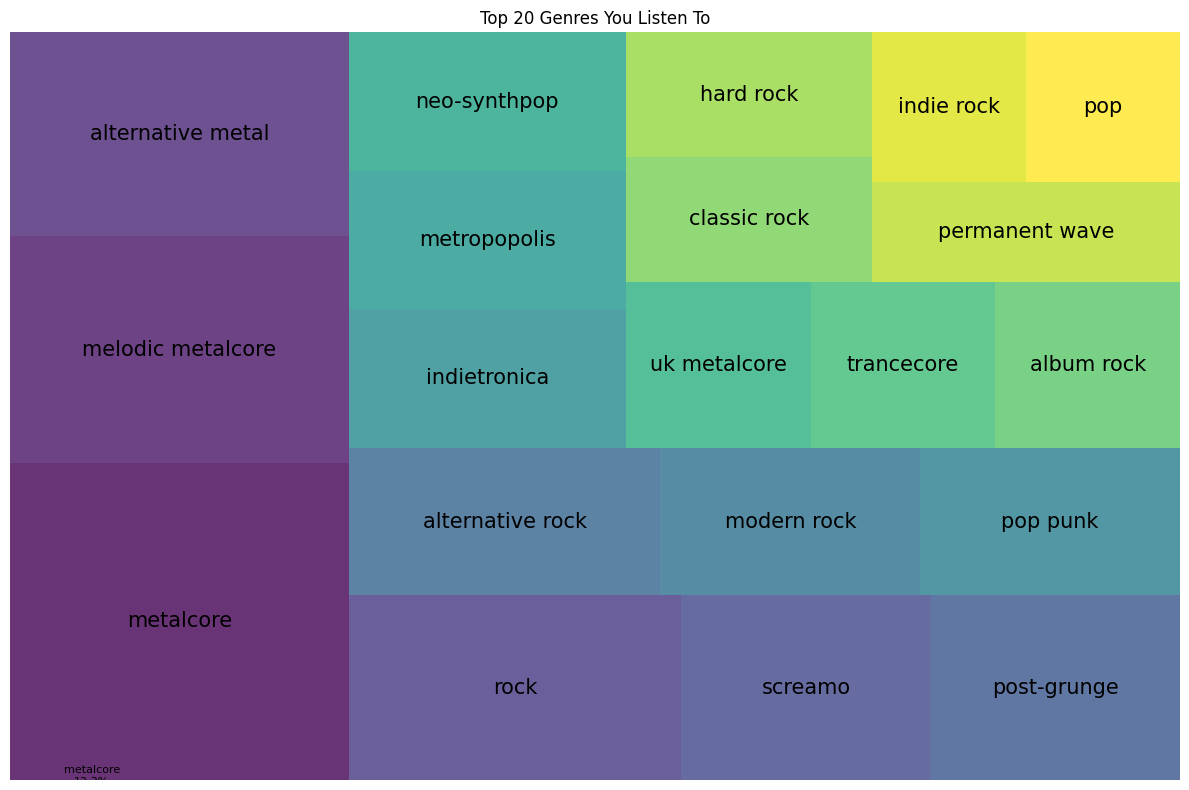

In [15]:
# Prepare data for treemap
genres, counts = zip(*top_genres)
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Create color map
colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))

# Create treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=counts, label=genres, alpha=.8, color=colors,
              text_kwargs={'fontsize': 15})  # Reduce font size
plt.title('Top 20 Genres You Listen To')
plt.axis('off')

# Add percentage labels
rects = squarify.squarify(counts, 0, 0, 1, 1)
for rect, genre, count in zip(rects, genres, counts):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    percentage = count / total * 100
    plt.text(x + dx/2, y + dy/2, f'{genre}\n{percentage:.1f}%',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=8,
         clip_on=True,
         zorder=10)  # Allow clipping of text outside rectangle

plt.tight_layout()
plt.show()


In [16]:
# Print results of top 20 genres
print("Your top 20 genres:")
for genre, count in top_genres:
    print(f"{genre}: {count} occurrences ({count/total*100:.1f}%)")

Your top 20 genres:
metalcore: 14 occurrences (12.3%)
melodic metalcore: 10 occurrences (8.8%)
alternative metal: 9 occurrences (7.9%)
rock: 8 occurrences (7.0%)
screamo: 6 occurrences (5.3%)
post-grunge: 6 occurrences (5.3%)
alternative rock: 6 occurrences (5.3%)
modern rock: 5 occurrences (4.4%)
pop punk: 5 occurrences (4.4%)
indietronica: 5 occurrences (4.4%)
metropopolis: 5 occurrences (4.4%)
neo-synthpop: 5 occurrences (4.4%)
uk metalcore: 4 occurrences (3.5%)
trancecore: 4 occurrences (3.5%)
album rock: 4 occurrences (3.5%)
classic rock: 4 occurrences (3.5%)
hard rock: 4 occurrences (3.5%)
permanent wave: 4 occurrences (3.5%)
indie rock: 3 occurrences (2.6%)
pop: 3 occurrences (2.6%)


**Top 10 Genres as a bar chart**

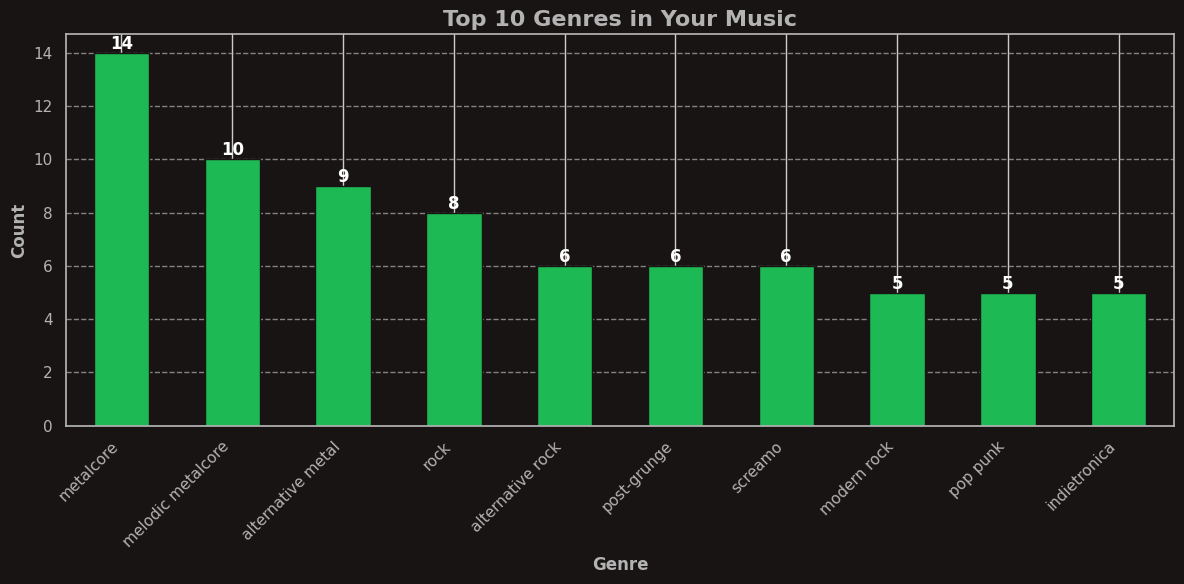

In [32]:
results = sp.current_user_top_artists(limit=50, time_range="medium_term")
genres = []

for item in results['items']:
    genres.extend(item['genres'])

genre_counts = pd.Series(genres).value_counts().head(10)

# Spotify color palette
spotify_colors = ['#1DB954', '#191414', '#FFFFFF', '#B3B3B3', '#B3B3B3']

plt.figure(figsize=(12, 6))
ax = genre_counts.plot(kind='bar', color=spotify_colors[0], edgecolor=spotify_colors[1])

plt.xlabel('Genre', fontweight='bold', color=spotify_colors[3])
plt.ylabel('Count', fontweight='bold', color=spotify_colors[3])
plt.title('Top 10 Genres in Your Music', fontweight='bold', color=spotify_colors[3], fontsize=16)
plt.xticks(rotation=45, ha='right', color=spotify_colors[3])
plt.yticks(color=spotify_colors[3])

# Customize the plot background and border
ax.set_facecolor(spotify_colors[1])
plt.gcf().set_facecolor(spotify_colors[1])
for spine in ax.spines.values():
    spine.set_edgecolor(spotify_colors[3])

# Add value labels on top of each bar
for i, v in enumerate(genre_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', color=spotify_colors[2], fontweight='bold')

# Customize the grid
ax.grid(axis='y', linestyle='--', alpha=0.7, color=spotify_colors[4])
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


**Energy distribution across Genres**

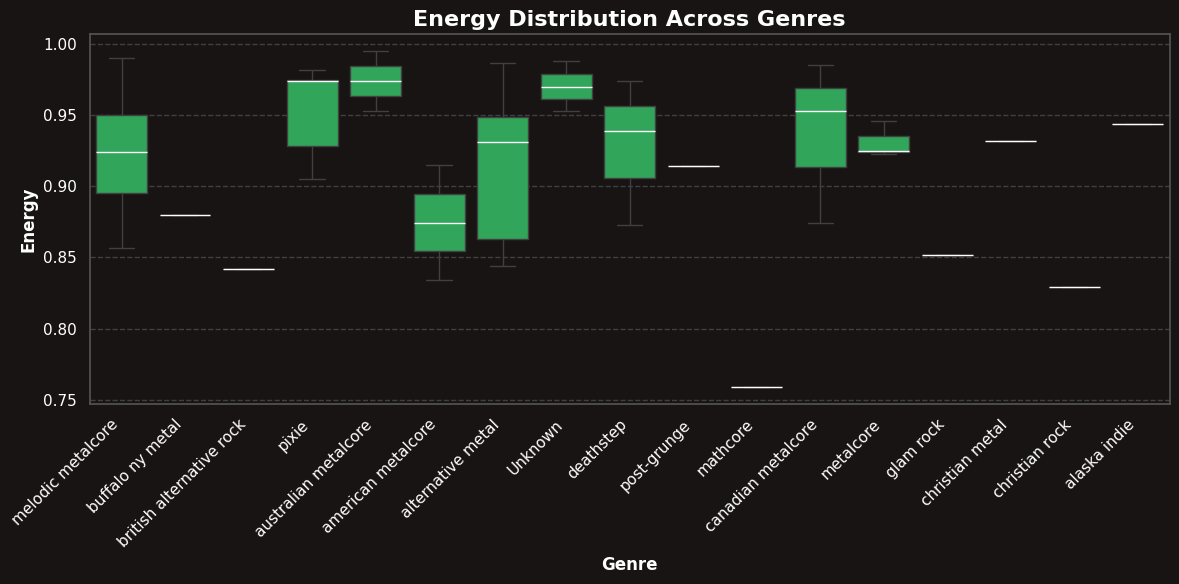

In [33]:
results = sp.current_user_top_tracks(limit=50, time_range="medium_term")
data = []

for item in results['items']:
    track_features = sp.audio_features(item['id'])[0]
    artist_info = sp.artist(item['artists'][0]['id'])
    data.append({
        'name': item['name'],
        'genre': artist_info['genres'][0] if artist_info['genres'] else 'Unknown',
        'danceability': track_features['danceability'],
        'energy': track_features['energy'],
        'valence': track_features['valence']
    })

df = pd.DataFrame(data)

# Spotify color palette
spotify_green = '#1DB954'
spotify_black = '#191414'
spotify_white = '#FFFFFF'
spotify_gray = '#535353'

# Set the style for the plot
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = spotify_black
plt.rcParams['figure.facecolor'] = spotify_black

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='genre', y='energy', data=df, color=spotify_green, medianprops={"color": spotify_white})

# Customize the plot
plt.xlabel('Genre', fontweight='bold', color=spotify_white)
plt.ylabel('Energy', fontweight='bold', color=spotify_white)
plt.title('Energy Distribution Across Genres', fontweight='bold', color=spotify_white, fontsize=16)
plt.xticks(rotation=45, ha='right', color=spotify_white)
plt.yticks(color=spotify_white)

# Customize the grid
ax.grid(axis='y', linestyle='--', alpha=0.7, color=spotify_gray)
ax.set_axisbelow(True)

# Customize the spines
for spine in ax.spines.values():
    spine.set_edgecolor(spotify_gray)

plt.tight_layout()
plt.show()


**Create a sunburst chart to visualise your music genres**

In [74]:
pio.templates.default = "plotly_dark"

genre_counts_sorted = genre_counts.sort_values(ascending=False).head(50)

genres = genre_counts_sorted.index.tolist()
counts = genre_counts_sorted.values.tolist()

# Create sunburst data
labels = ["All Genres"] + genres
parents = [""] + ["All Genres"] * len(genres)
values = [sum(counts)] + counts

# Create sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    marker=dict(colors=counts, colorscale="Viridis"),
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percentParent:.1%}',
))

fig.update_layout(title_text="Your Music Genre Universe", width=800, height=800)
fig.show()


#Top Artists & Tracks
This section outputs stats about your listening such as top 10 artists listened to in the medium term:

In [19]:
#Get top 10 artists you've listened to:
top_artists = sp.current_user_top_artists(limit=10, time_range="medium_term")
for i, artist in enumerate(top_artists['items']):
    print(f"{i+1}. {artist['name']}")


1. Bring Me The Horizon
2. Dance Gavin Dance
3. Beartooth
4. Spiritbox
5. CHVRCHES
6. Polaris
7. Enter Shikari
8. Bad Omens
9. A Day To Remember
10. Of Mice & Men


Bar chart visualisation showing top 20 tracks listened to in the medium term by popularity score.

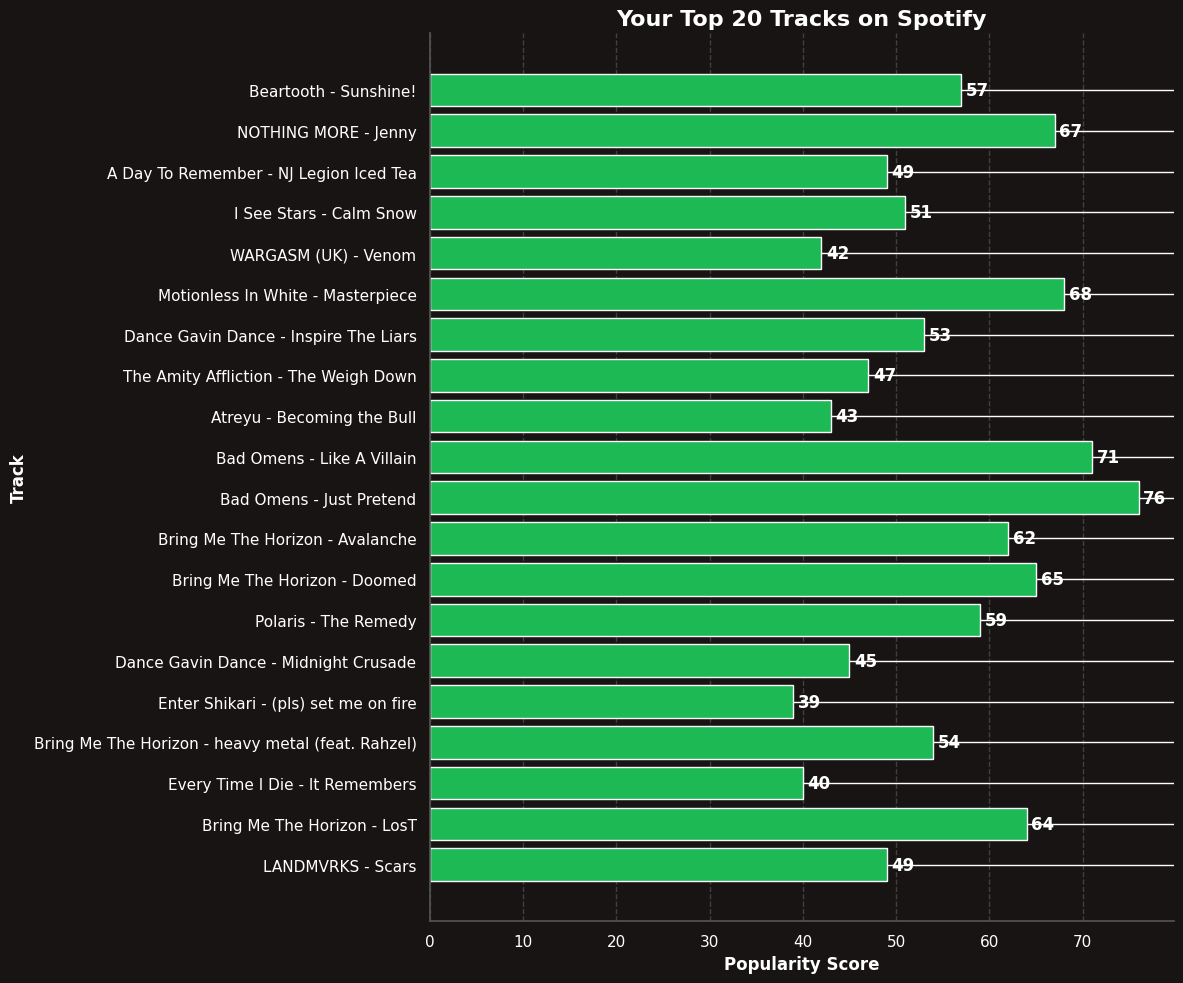

In [34]:
# Fetch top 20 tracks
top_tracks = sp.current_user_top_tracks(limit=20, time_range="medium_term")

# Prepare data for visualization
track_names = []
popularities = []
artists = []

for track in top_tracks['items']:
    track_names.append(track['name'])
    popularities.append(track['popularity'])
    artists.append(track['artists'][0]['name'])

# Create a list of "Artist - Track" for labels
labels = [f"{artist} - {track}" for artist, track in zip(artists, track_names)]

# Spotify color palette
spotify_green = '#1DB954'
spotify_black = '#191414'
spotify_white = '#FFFFFF'
spotify_gray = '#535353'

# Set up the plot
plt.figure(figsize=(12, 10))
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = spotify_black
plt.rcParams['figure.facecolor'] = spotify_black

# Create horizontal bar plot
bars = plt.barh(range(len(popularities)), popularities, align='center', color=spotify_green)

# Customize the plot
plt.title("Your Top 20 Tracks on Spotify", fontsize=16, color=spotify_white, fontweight='bold')
plt.xlabel("Popularity Score", fontsize=12, color=spotify_white, fontweight='bold')
plt.ylabel("Track", fontsize=12, color=spotify_white, fontweight='bold')

# Set y-axis ticks and labels
plt.yticks(range(len(labels)), labels, color=spotify_white)

# Add popularity scores at the end of each bar
for i, v in enumerate(popularities):
    plt.text(v + 0.5, i, str(v), va='center', color=spotify_white, fontweight='bold')

# Customize the grid
plt.grid(axis='x', linestyle='--', alpha=0.7, color=spotify_gray)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Color remaining spines
plt.gca().spines['left'].set_color(spotify_gray)
plt.gca().spines['bottom'].set_color(spotify_gray)

# Adjust layout and display
plt.tight_layout()
plt.show()


And the same for top 50 over a long term period

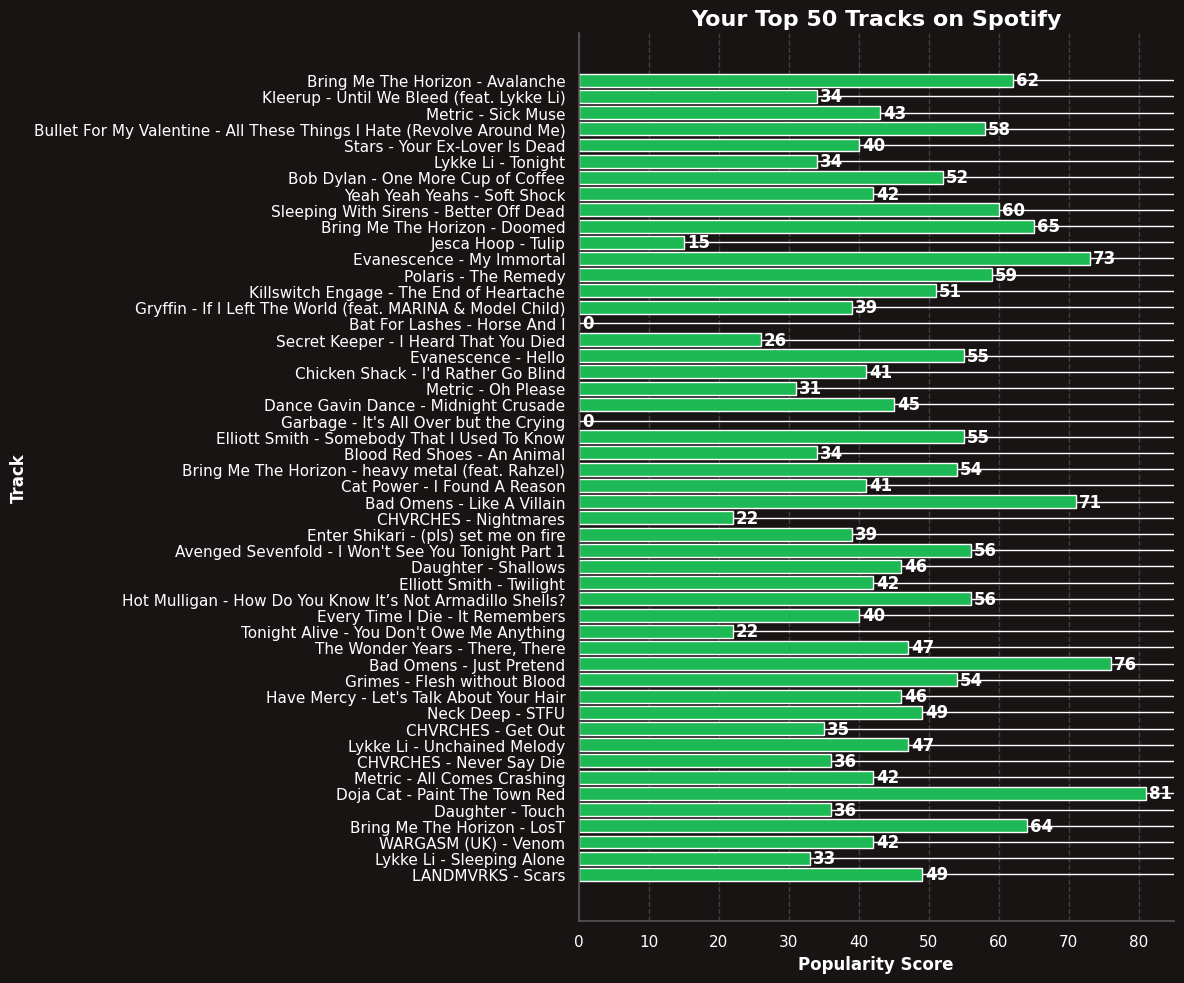

In [35]:
# Fetch top 50 tracks
top_tracks = sp.current_user_top_tracks(limit=50, time_range="long_term")

# Prepare data for visualization
track_names = []
popularities = []
artists = []

for track in top_tracks['items']:
    track_names.append(track['name'])
    popularities.append(track['popularity'])
    artists.append(track['artists'][0]['name'])

# Create a list of "Artist - Track" for labels
labels = [f"{artist} - {track}" for artist, track in zip(artists, track_names)]

# Spotify color palette
spotify_green = '#1DB954'
spotify_black = '#191414'
spotify_white = '#FFFFFF'
spotify_gray = '#535353'

# Set up the plot
plt.figure(figsize=(12, 10))
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = spotify_black
plt.rcParams['figure.facecolor'] = spotify_black

# Create horizontal bar plot
bars = plt.barh(range(len(popularities)), popularities, align='center', color=spotify_green)

# Customize the plot
plt.title("Your Top 50 Tracks on Spotify", fontsize=16, color=spotify_white, fontweight='bold')
plt.xlabel("Popularity Score", fontsize=12, color=spotify_white, fontweight='bold')
plt.ylabel("Track", fontsize=12, color=spotify_white, fontweight='bold')

# Set y-axis ticks and labels
plt.yticks(range(len(labels)), labels, color=spotify_white)

# Add popularity scores at the end of each bar
for i, v in enumerate(popularities):
    plt.text(v + 0.5, i, str(v), va='center', color=spotify_white, fontweight='bold')

# Customize the grid
plt.grid(axis='x', linestyle='--', alpha=0.7, color=spotify_gray)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Color remaining spines
plt.gca().spines['left'].set_color(spotify_gray)
plt.gca().spines['bottom'].set_color(spotify_gray)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [22]:
# Print the list
print("Your top 50 tracks:")
for i, (track, artist, popularity) in enumerate(zip(track_names, artists, popularities), 1):
    print(f"{i}. {artist} - {track} (Popularity: {popularity})")


Your top 50 tracks:
1. LANDMVRKS - Scars (Popularity: 49)
2. Lykke Li - Sleeping Alone (Popularity: 33)
3. WARGASM (UK) - Venom (Popularity: 42)
4. Bring Me The Horizon - LosT (Popularity: 64)
5. Daughter - Touch (Popularity: 36)
6. Doja Cat - Paint The Town Red (Popularity: 81)
7. Metric - All Comes Crashing (Popularity: 42)
8. CHVRCHES - Never Say Die (Popularity: 36)
9. Lykke Li - Unchained Melody (Popularity: 47)
10. CHVRCHES - Get Out (Popularity: 35)
11. Neck Deep - STFU (Popularity: 49)
12. Have Mercy - Let's Talk About Your Hair (Popularity: 46)
13. Grimes - Flesh without Blood (Popularity: 54)
14. Bad Omens - Just Pretend (Popularity: 76)
15. The Wonder Years - There, There (Popularity: 47)
16. Tonight Alive - You Don't Owe Me Anything (Popularity: 22)
17. Every Time I Die - It Remembers (Popularity: 40)
18. Hot Mulligan - How Do You Know It’s Not Armadillo Shells? (Popularity: 56)
19. Elliott Smith - Twilight (Popularity: 42)
20. Daughter - Shallows (Popularity: 46)
21. Aveng

#Short term vs Long Term Listening by features
In this section we take the top 50 tracks from both the short term range and long term range, and then we compare them using a barbell chart. To visualise the temp on the same chart we've had to normalise it to a range. The features with the most space between them are the ones that have changed the greatest.

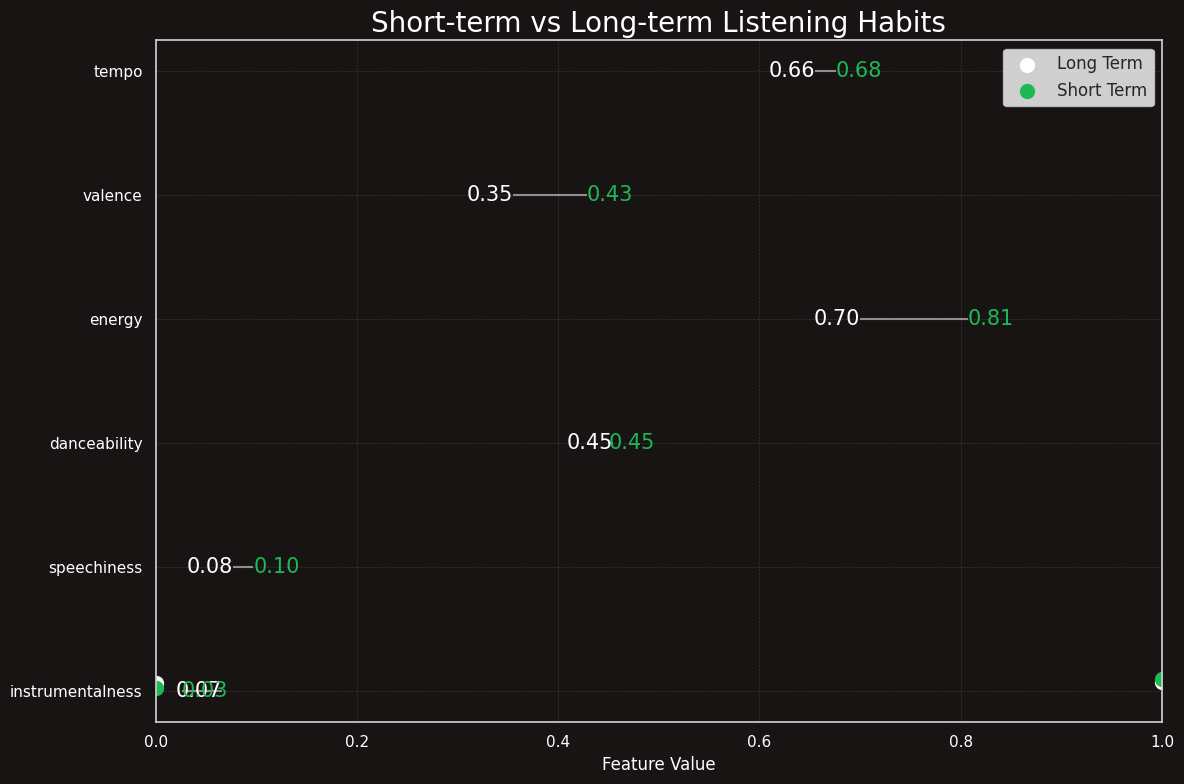

In [23]:
def get_track_data(time_range, limit=50):
    top_tracks = sp.current_user_top_tracks(limit=limit, time_range=time_range)
    track_data = []
    for track in top_tracks['items']:
        track_id = track['id']
        features = sp.audio_features(track_id)[0]
        track_data.append({
            'name': f"{track['artists'][0]['name']} - {track['name']}",
            'popularity': track['popularity'],
            'instrumentalness': features['instrumentalness'],
            'speechiness': features['speechiness'],
            'danceability': features['danceability'],
            'energy': features['energy'],
            'valence': features['valence'],
            'tempo': features['tempo'] / 200  # Normalize tempo to 0-1 range (assuming max tempo is 200 BPM)
        })
    return track_data

# Get track data for short-term and long-term
short_term_data = get_track_data('short_term')
long_term_data = get_track_data('long_term')

# Calculate averages for each feature
features = ['instrumentalness', 'speechiness', 'danceability', 'energy', 'valence', 'tempo']
short_term_avg = {feature: np.mean([track[feature] for track in short_term_data]) for feature in features}
long_term_avg = {feature: np.mean([track[feature] for track in long_term_data]) for feature in features}

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#191414')
ax.set_facecolor('#191414')

# Plot the dumbbell chart
y_pos = np.arange(len(features))
ax.hlines(y_pos, [long_term_avg[f] for f in features], [short_term_avg[f] for f in features], color='white', alpha=0.5)
ax.scatter(y_pos, [long_term_avg[f] for f in features], color='#FFF', s=100, label='Long Term')
ax.scatter(y_pos, [short_term_avg[f] for f in features], color='#1DB954', s=100, label='Short Term')

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.set_xlabel('Feature Value', color='white')
ax.set_title("Short-term vs Long-term Listening Habits", color='white', fontsize=20)
ax.legend(loc='upper right', fontsize=12)

# Set x-axis limits
ax.set_xlim(0, 1)

# Adjust text color
for text in ax.get_xticklabels() + ax.get_yticklabels():
    text.set_color('white')

# Add gridlines
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

# Add value labels
for i, feature in enumerate(features):
    ax.text(long_term_avg[feature], i, f'{long_term_avg[feature]:.2f}', va='center', ha='right', color='white', fontsize=15)
    ax.text(short_term_avg[feature], i, f'{short_term_avg[feature]:.2f}', va='center', ha='left', color='#1DB954', fontsize=15)

plt.tight_layout()
plt.show()

We could also compare features for many tracks using a scatter plot.

In [24]:
# Print average values
print("Average values:")
print("Feature      | Short Term | Long Term")
print("-------------|------------|----------")
for feature in features:
    print(f"{feature:<12} | {short_term_avg[feature]:.4f}    | {long_term_avg[feature]:.4f}")


Average values:
Feature      | Short Term | Long Term
-------------|------------|----------
instrumentalness | 0.0261    | 0.0655
speechiness  | 0.0969    | 0.0768
danceability | 0.4499    | 0.4545
energy       | 0.8068    | 0.7001
valence      | 0.4282    | 0.3545
tempo        | 0.6756    | 0.6555


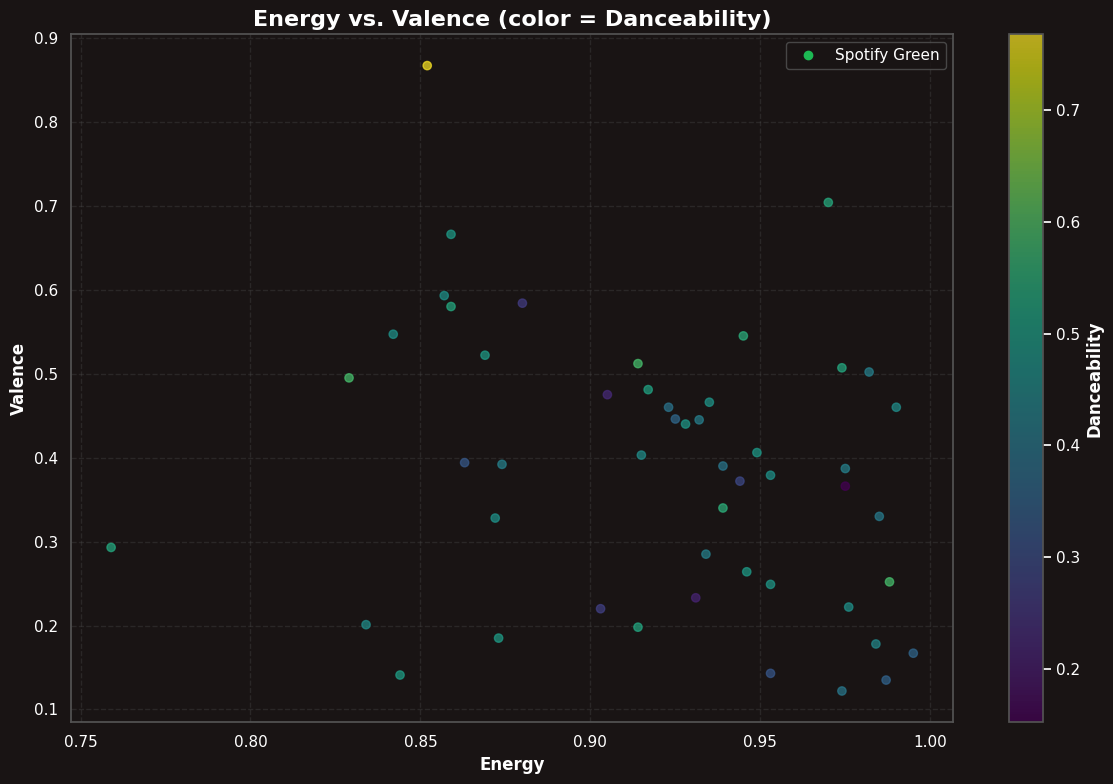

In [36]:
# Fetch top 50 tracks and their features
results = sp.current_user_top_tracks(limit=50, time_range="medium_term")
features = []

for item in results['items']:
    track_features = sp.audio_features(item['id'])[0]
    features.append({
        'name': item['name'],
        'artist': item['artists'][0]['name'],
        'acousticness': track_features['acousticness'],
        'danceability': track_features['danceability'],
        'energy': track_features['energy'],
        'valence': track_features['valence']
    })

df = pd.DataFrame(features)

# Spotify color palette
spotify_green = '#1DB954'
spotify_black = '#191414'
spotify_white = '#FFFFFF'
spotify_gray = '#535353'

# Set up the plot
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = spotify_black
plt.rcParams['figure.facecolor'] = spotify_black

# Create scatter plot
scatter = plt.scatter(df['energy'], df['valence'], c=df['danceability'], cmap='viridis', alpha=0.7)

# Customize the plot
plt.title("Energy vs. Valence (color = Danceability)", fontsize=16, color=spotify_white, fontweight='bold')
plt.xlabel("Energy", fontsize=12, color=spotify_white, fontweight='bold')
plt.ylabel("Valence", fontsize=12, color=spotify_white, fontweight='bold')

# Customize the colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Danceability', color=spotify_white, fontweight='bold')
cbar.ax.yaxis.set_tick_params(color=spotify_white)
cbar.outline.set_edgecolor(spotify_gray)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=spotify_white)

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.3, color=spotify_gray)

# Customize the spines
for spine in plt.gca().spines.values():
    spine.set_edgecolor(spotify_gray)

# Customize tick colors
plt.tick_params(colors=spotify_white)

# Add Spotify logo colors to the plot
plt.plot([], [], 'o', color=spotify_green, label='Spotify Green')
plt.legend(labelcolor=spotify_white, facecolor=spotify_black, edgecolor=spotify_gray)

plt.tight_layout()
plt.show()


In [26]:
# Find the song with the highest energy
highest_energy_song = df.loc[df['energy'].idxmax()]

print("Song with the highest energy:")
print(f"Name: {highest_energy_song['name']}")
print(f"Artist: {highest_energy_song['artist']}")
print(f"Energy: {highest_energy_song['energy']:.2f}")
print(f"Danceability: {highest_energy_song['danceability']:.2f}")
print(f"Valence: {highest_energy_song['valence']:.2f}")

Song with the highest energy:
Name: The Remedy
Artist: Polaris
Energy: 0.99
Danceability: 0.36
Valence: 0.17


#Top Artists listened to
over all periods, with the total songs if more than 1 song makes the top 50 for 1 artist.

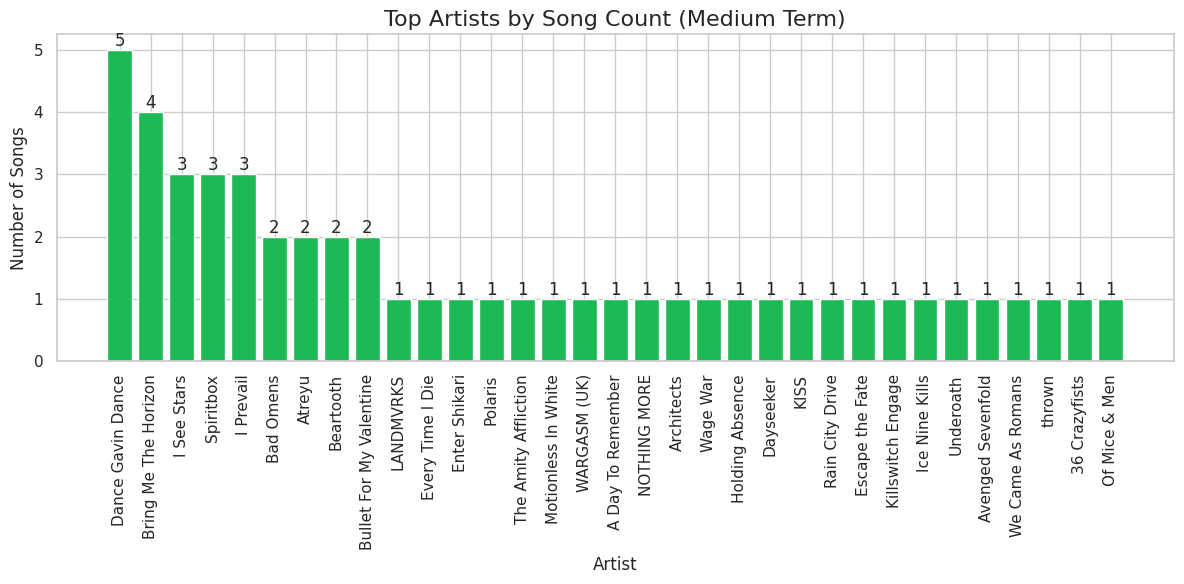

In [27]:
# Top Artists by Song Count within a medium term time range over 50 songs
results = sp.current_user_top_tracks(limit=50, time_range="medium_term")
artist_count = {}

for item in results['items']:
    artist = item['artists'][0]['name']
    artist_count[artist] = artist_count.get(artist, 0) + 1

# Sort artists by count in descending order
sorted_artists = sorted(artist_count.items(), key=lambda x: x[1], reverse=True)
artists, counts = zip(*sorted_artists)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(artists, counts, color='#1DB954')  # Spotify green color

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Top Artists by Song Count (Medium Term)', fontsize=16)

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()


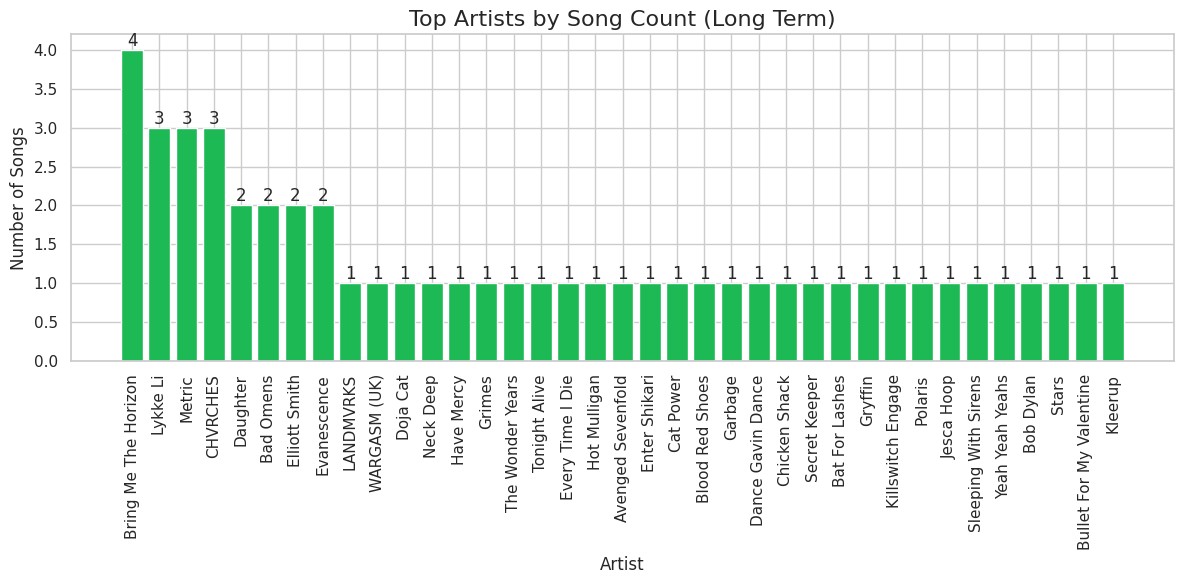

In [28]:
# Top Artists by Song Count within a medium term time range over 50 songs
results = sp.current_user_top_tracks(limit=50, time_range="long_term")
artist_count = {}

for item in results['items']:
    artist = item['artists'][0]['name']
    artist_count[artist] = artist_count.get(artist, 0) + 1

# Sort artists by count in descending order
sorted_artists = sorted(artist_count.items(), key=lambda x: x[1], reverse=True)
artists, counts = zip(*sorted_artists)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(artists, counts, color='#1DB954')  # Spotify green color

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Top Artists by Song Count (Long Term)', fontsize=16)

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()


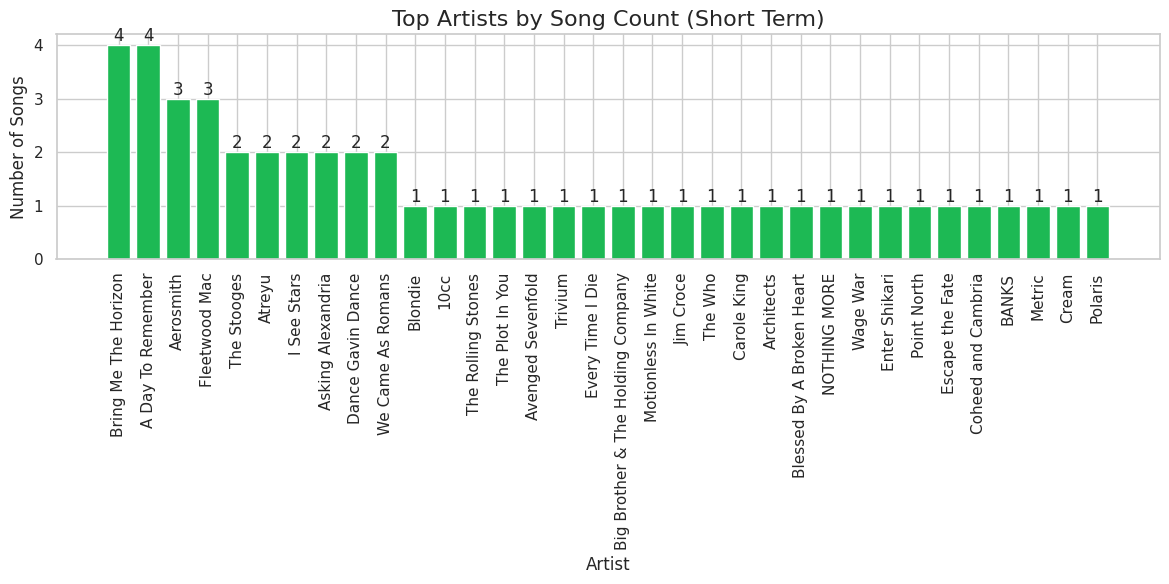

In [29]:
# Top Artists by Song Count within a medium term time range over 50 songs
results = sp.current_user_top_tracks(limit=50, time_range="short_term")
artist_count = {}

for item in results['items']:
    artist = item['artists'][0]['name']
    artist_count[artist] = artist_count.get(artist, 0) + 1

# Sort artists by count in descending order
sorted_artists = sorted(artist_count.items(), key=lambda x: x[1], reverse=True)
artists, counts = zip(*sorted_artists)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(artists, counts, color='#1DB954')  # Spotify green color

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Top Artists by Song Count (Short Term)', fontsize=16)

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()


#Tracks by popular words

In this code you can handle removal of words such as 'feat' which referred to a 'featuring' an artists and therefore wasnt part of the track name.

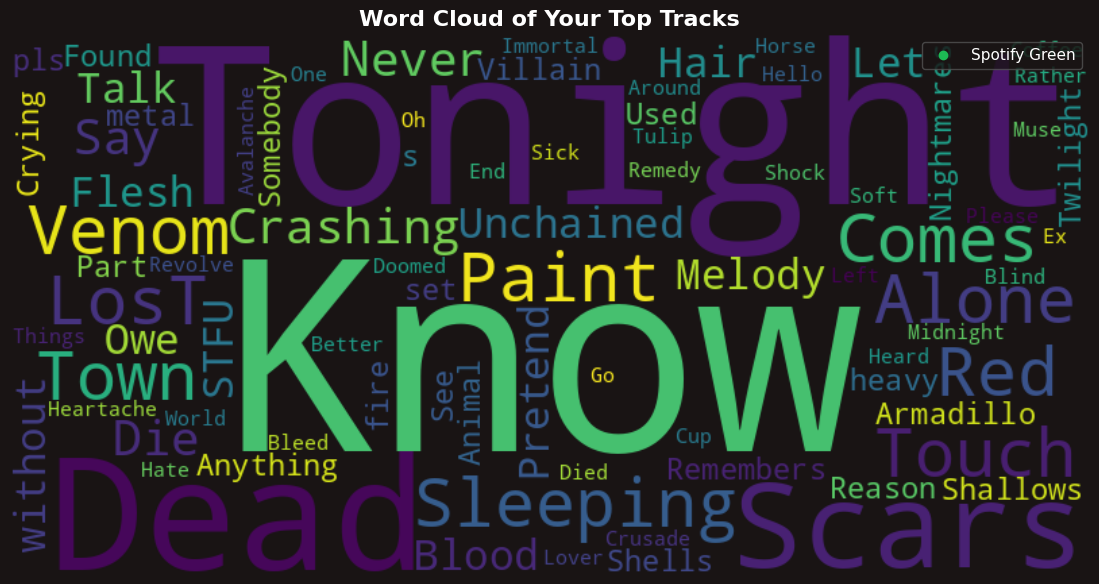

In [41]:
results = sp.current_user_top_tracks(limit=50, time_range="long_term")

# Preprocess track names to remove 'feat' and anything after it
track_names = ' '.join([re.sub(r'\(feat\..*?\)|\(ft\..*?\)', '', item['name']).strip() for item in results['items']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color=spotify_black, colormap='viridis').generate(track_names)

# Set up the plot
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = spotify_black
plt.rcParams['figure.facecolor'] = spotify_black

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Your Top Tracks', fontsize=16, color=spotify_white, fontweight='bold')

# Add Spotify logo colors to the plot
plt.plot([], [], 'o', color=spotify_green, label='Spotify Green')
plt.legend(labelcolor=spotify_white, facecolor=spotify_black, edgecolor=spotify_gray, loc='upper right')

plt.tight_layout()
plt.show()


#Artist Popularity and Followers

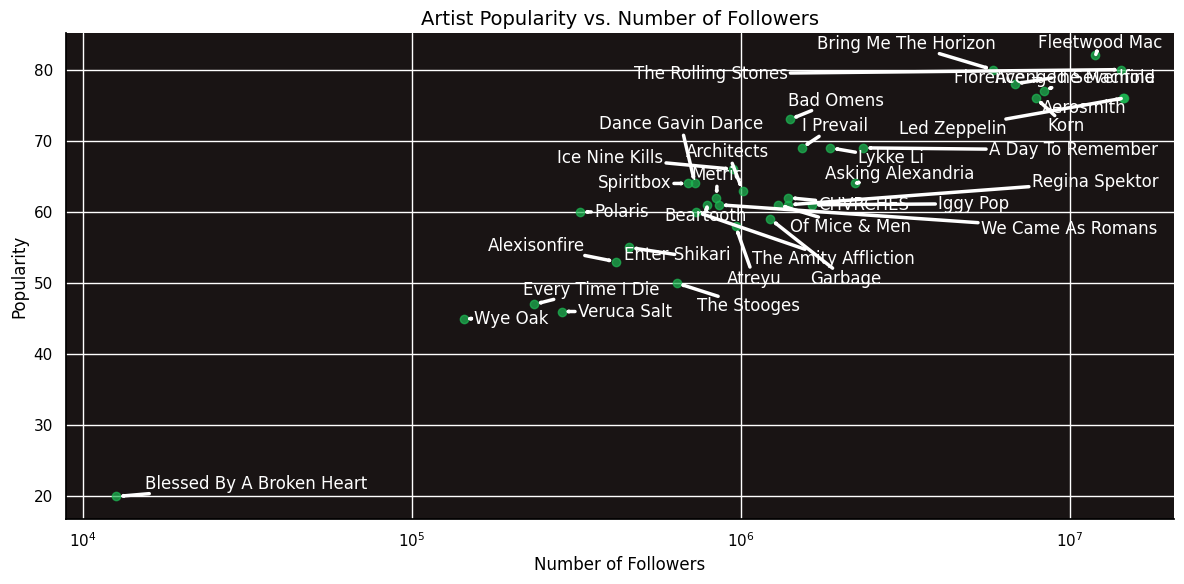

In [78]:
results = sp.current_user_top_artists(limit=35, time_range="short_term")
popularity = []
followers = []
names = []

for item in results['items']:
    popularity.append(item['popularity'])
    followers.append(item['followers']['total'])
    names.append(item['name'])

plt.figure(figsize=(12, 6), facecolor='white')
scatter = plt.scatter(followers, popularity, alpha=0.7, color='#1DB954')  # Spotify green
plt.xlabel('Number of Followers', fontsize=12, color='black')
plt.ylabel('Popularity', fontsize=12, color='black')
plt.title('Artist Popularity vs. Number of Followers', fontsize=14, color='black')
plt.xscale('log')

# Customize the appearance
plt.tick_params(colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

texts = []
for i, name in enumerate(names):
    texts.append(plt.text(followers[i], popularity[i], name, color='white', fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white', lw=2.5))

plt.tight_layout()
plt.show()


#Tracks listened to the most

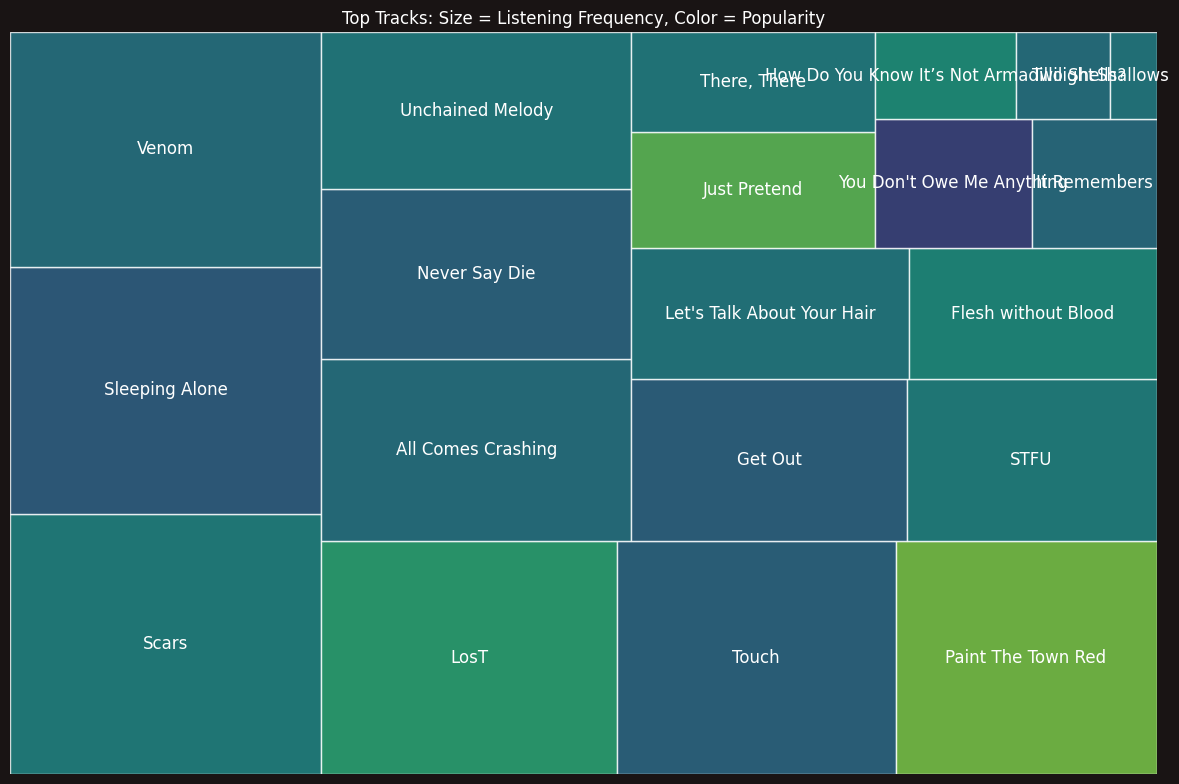

In [61]:
results = sp.current_user_top_tracks(limit=20, time_range="long_term")
sizes = []
colors = []
labels = []

for i, item in enumerate(results['items']):
    sizes.append(20 - i)
    colors.append(item['popularity'])
    labels.append(item['name'])

colors = np.array(colors) / 100

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, color=plt.cm.viridis(colors), label=labels, alpha=0.8)
plt.axis('off')
plt.title('Top Tracks: Size = Listening Frequency, Colour = Popularity')
plt.tight_layout()
plt.show()
